## Dataset Consideration

In [ ]:
import pandas as pd
import json

In [ ]:
pip install tqdm ijson


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
import ijson
from tqdm import tqdm
import csv
import numpy as np
import time
from decimal import Decimal

Process_data function is used to preprocess the data and select the columns that are needed for the further analysis . The code recipe has been taken from kaggle so as to convert the json file into csv. Since the dataset that we are dealing with is too large to analyse for our computational resource, we created a new csv file for which the top 10000 papers are considered based on the n_citation column.

In [ ]:
def process_data(element, writer, count, start):
    # Initializing a dictionary to store extracted information for each paper
    paper = {}

    # Extracting 'id' and 'title'
    paper['id'] = element['id']
    paper['title'] = element['title']

    # Extracting 'year' with handling for missing or null values
    year = element.get('year')
    if year:
        paper['year'] = year
    else:
        paper['year'] = np.nan

    # Extracting 'authors' information with handling for missing or null values
    author = element.get('authors')
    if author:
        Author = element['authors']
        author_name = []
        author_org = []
        author_id = []

        for i in Author:
            if 'name' in i and 'id' in i and 'org' in i:
                author_name.append(str(i['name']))
                author_id.append(str(i['id']))
                author_org.append(str(i['org']))
            else:
                author_name.append(str(np.nan))
                author_id.append(str(np.nan))
                author_org.append(str(np.nan))

        paper['author_name'] = ';'.join(author_name)
        paper['author_org'] = ';'.join(author_org)
        paper['author_id'] = ';'.join(author_id)

    # Extract 'n_citation' with handling for missing or null values
    n_citation = element.get('n_citation')
    if n_citation:
        paper['n_citation'] = n_citation
    else:
        paper['n_citation'] = np.nan

    # Extract 'doc_type' with handling for missing or null values
    doc_type = element.get('doc_type')
    if doc_type:
        paper['doc_type'] = doc_type
    else:
        paper['doc_type'] = np.nan

    # Extract 'references' with handling for missing or null values
    references = element.get('references')
    if references:
        paper['reference_count'] = len(references)
        paper['references'] = ';'.join(str(int(r)) for r in references)
    else:
        paper['references'] = np.nan

    # Extract 'venue' information with handling for missing or null values
    venue = element.get('venue')
    if venue:
        if 'id' in venue and 'raw' in venue and 'type' in venue:
            paper['venue_id'] = str(venue['id'])
            paper['venue_name'] = venue['raw']
            paper['venue_type'] = venue['type']
        else:
            paper['venue_id'] = np.nan
            paper['venue_name'] = np.nan
            paper['venue_type'] = np.nan
    else:
        paper['venue_id'] = np.nan
        paper['venue_name'] = np.nan
        paper['venue_type'] = np.nan

    # Extract 'doi' with handling for missing or null values
    doi = element.get('doi')
    if doi:
        paper['doi'] = f"https://doi.org/{doi}"
    else:
        paper['doi'] = np.nan

    # Extract 'fos' (field of study) with handling for missing or null values
    fos = element.get('fos')
    if fos:
        fosunparsed = element['fos']
        keyword = []
        weight = []

        for i in fosunparsed:
            if isinstance(i['w'], (int, float, Decimal)):
                keyword.append(str(i['name']))
                weight.append(str(i['w']))
            else:
                keyword.append(str(np.nan))
                weight.append(str(np.nan))
    else:
        keyword = []
        weight = []

    paper['keyword'] = ';'.join(keyword)
    paper['weight'] = ';'.join(weight)

    # Write the processed paper dictionary to the CSV file
    writer.writerow(paper)

    # Print progress every 4800 records
    if count % 4800 == 0:
        print(f"{count}:{round((time.process_time() - start), 2)}s ", end="")


In [ ]:
def main(input_file, output_file):
    # Open the input JSON file for reading and the output CSV file for writing
    with open(input_file, 'r', encoding='utf-8') as f, open(output_file, 'w', encoding='utf-8', newline='') as csvfile:
        # Define the fieldnames for the CSV header
        fieldnames = ['id', 'title', 'year', 'author_name', 'author_org', 'author_id', 'n_citation', 'doc_type',
                      'reference_count', 'references', 'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword',
                      'volume', 'issue', 'publisher', 'weight', 'indexed_keyword', 'inverted_index']

        # Create a CSV DictWriter
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames,escapechar='\\')

        # Write the header to the CSV file
        writer.writeheader()

        # Initialize counters for progress tracking
        count = 0
        start = time.process_time()

        # Iterate through the JSON elements using ijson
        for i, element in enumerate(ijson.items(f, "item")):
            # Process each JSON element and write to CSV
            process_data(element, writer, count, start)

            # Increment the count
            count += 1


In [ ]:
df = pd.read_csv("prep.csv")

The dataset is saved as prep.csv after preprocessing and converting it into csv from json using kaggle code recipe.

In [ ]:
df_sorted = df.sort_values(by='n_citation', ascending=False)

# Select the 'title' and 'n_citation' columns for the top 10,000 records
top_10000_papers = df_sorted.head(10000)[['title', 'n_citation']]

# Print or further process the top 10,000 papers
print(top_10000_papers)

                                                     title  n_citation
4696136           The Mathematical Theory of Communication     48327.0
4630907  Genetic algorithms in search, optimization, an...     44175.0
4092588                                         Fuzzy sets     42437.0
2937610  Distinctive Image Features from Scale-Invarian...     35541.0
4088311                                     Random Forests     34741.0
...                                                    ...         ...
794854           An overview of JML tools and applications       596.0
2109151  Countering code-injection attacks with instruc...       596.0
2366931  Gaussian Process Dynamical Models for Human Mo...       596.0
2621703  EVENODD: an efficient scheme for tolerating do...       596.0
2014229  Simultaneous structure and texture image inpai...       596.0

[10000 rows x 2 columns]


In [ ]:
num_records = df_sorted.shape[0]

# Print the result
print(f"Number of records in df_sorted: {num_records}")

Number of records in df_sorted: 4894081


In [ ]:
author_name_counts = df['author_name'].value_counts()

In [ ]:
# Check for null values in the "author_name" column
null_values_author_name = df['author_name'].isnull().sum()

# Print the number of null values in the "author_name" column
print(f'Number of null values in the "author_name" column: {null_values_author_name}')


Number of null values in the "author_name" column: 268382


In [ ]:
top_re.to_csv('top_10000_papers.csv', index=False)

In [ ]:
top_re = pd.read_csv("top_10000_papers.csv")

In [ ]:
# Check for missing values in the DataFrame
missing_values2 = top_re.isnull().sum()


# Display the count of missing values for each column
print(missing_values2)

id                     0
title                  0
year                   0
author_name          488
author_org           488
author_id            488
n_citation             0
doc_type             350
reference_count     1202
references          1202
venue_id             984
venue_name           984
venue_type           984
doi                 1549
keyword                1
volume             10000
issue              10000
publisher          10000
weight                 1
indexed_keyword    10000
inverted_index     10000
dtype: int64


## 1. **Data (Graph setup)**

**Key Considerations** before setting up the graphs (as instructed):

- **Citation graph:** This graph should represent the paper's citation relationships. We want this graph to be unweighted and directed. The citation should represent the citation given from one paper to another. For example, if paper A has cited paper B, we should expect an edge from node A to B.

- **Collaboration graph:** This graph should represent the collaborations of the paper's authors. This graph should be weighted and undirected. Consider an appropriate weighting scheme for your edges to make your graph weighted.

In [ ]:
import pandas as pd
top_re = pd.read_csv("top_10000_papers.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Citation Graph**

In [ ]:
import networkx as nx

citation_graph = nx.DiGraph()

# Extracting and adding directed edges for citation relationships
citation_edges = []
for _, row in top_re.dropna(subset=['references']).iterrows():
    references = str(row['references']).split(';')
    for reference in references:
        if reference and reference != 'nan':
            # Ensuring that both source and target nodes are in the top 10,000 papers
            if row['id'] in top_re['id'].values and int(reference) in top_re['id'].values:
                citation_edges.append((row['id'], int(reference)))

citation_graph.add_edges_from(citation_edges)



Citation Graph is created by initializing a directed citation graph using NetworkX, where edges represent paper-to-paper citation relationships. It processes a DataFrame (top_re), extracting citation information from the 'references' column. For each paper, it checks if both the source and target papers are among the top 10,000. If so, it adds an edge to the graph, connecting the source paper to the target paper based on the citation information.

In [ ]:
print(citation_graph)

DiGraph with 9429 nodes and 52289 edges


As per result we can see that a directed graph has been created with 9,429 nodes (papers) and 52,289 edges (citation relationships). This means that there are 9,429 papers in preprocesed our dataset, and they cite each other a total of 52,289 times according to the provided citation information.

In [ ]:
in_degree = citation_graph.in_degree()

# Counting the number of nodes with incoming edges (cited papers)
num_cited_papers = sum(1 for _, degree in in_degree if degree > 0)

print(f"Number of papers cited: {num_cited_papers}")

Number of papers cited: 8078


the result indicates that out of the 9,429 papers in your citation graph, 8,078 of them have received at least one citation from other papers.

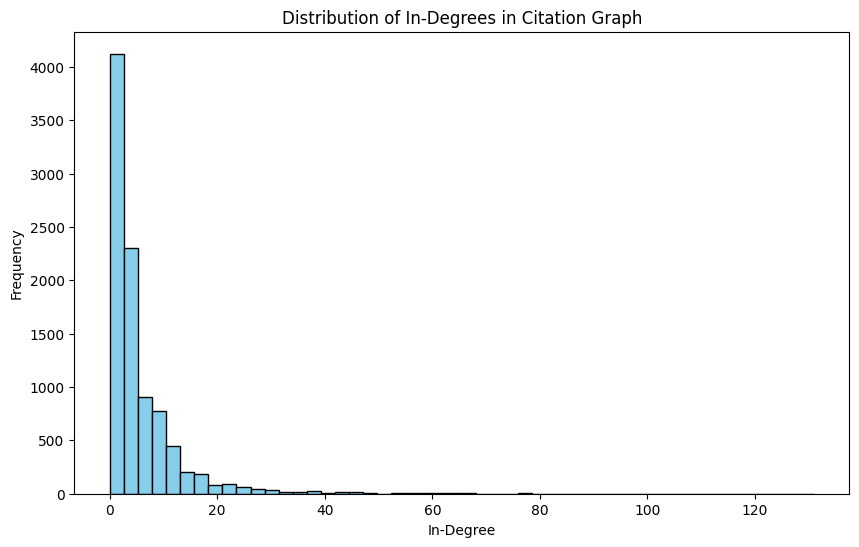


Top 10 Highly Cited Papers:
Paper ID: 2151103935, In-Degree: 131
Paper ID: 2156909104, In-Degree: 120
Paper ID: 1791587663, In-Degree: 117
Paper ID: 1639032689, In-Degree: 104
Paper ID: 2041404167, In-Degree: 95
Paper ID: 2161969291, In-Degree: 94
Paper ID: 2125055259, In-Degree: 89
Paper ID: 2156186849, In-Degree: 87
Paper ID: 2147152072, In-Degree: 78
Paper ID: 1956559956, In-Degree: 76

Number of Connected Components: 44


In [ ]:
import matplotlib.pyplot as plt

in_degrees = dict(citation_graph.in_degree())
in_degree_values = list(in_degrees.values())

plt.figure(figsize=(10, 6))
plt.hist(in_degree_values, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of In-Degrees in Citation Graph')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

# Identifying Highly Cited Papers (Top 10)
top_cited_papers = sorted(in_degrees, key=in_degrees.get, reverse=True)[:10]
print("\nTop 10 Highly Cited Papers:")
for paper_id in top_cited_papers:
    print(f"Paper ID: {paper_id}, In-Degree: {in_degrees[paper_id]}")

# Connected Components
connected_components = list(nx.weakly_connected_components(citation_graph))
num_connected_components = len(connected_components)

print(f"\nNumber of Connected Components: {num_connected_components}")


The visualization depicts the distribution of citations among papers in a citation graph, revealing a skewed pattern. The vast majority of papers receive very few citations, while a small number of highly influential papers garner a disproportionate share of attention.

upon internet reserach, we can to know that this nature is power-law distribution which underscores the uneven distribution of impact in scientific literature.

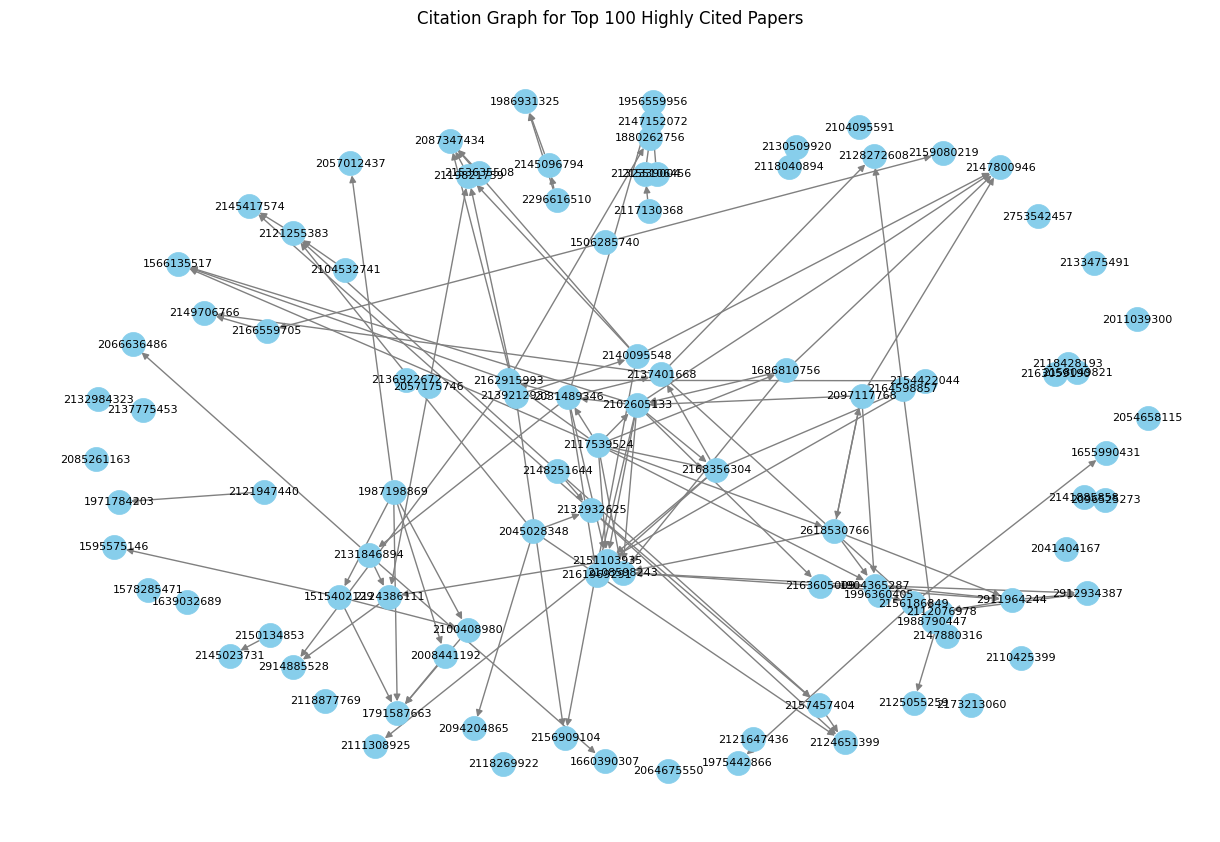

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

top_100_cited_papers = sorted(in_degrees, key=in_degrees.get, reverse=True)[:100]

# Extracting the subgraph for the top 100 highly cited papers
subgraph_top_100 = citation_graph.subgraph(top_100_cited_papers)

# Plotting the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph_top_100)
nx.draw(subgraph_top_100, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5)
plt.title('Citation Graph for Top 100 Highly Cited Papers')
plt.show()


Since visualizing all the nodes and its edges is too cumbersome and overwhelming, we consider visualizing a subgraph of the main graph (Citation Graph) which is for top 100 highly cited papers.

### **Collaboration Graph**

In [ ]:
collaboration_graph = nx.Graph()

# Extracting and adding edges for collaborations among authors
for _, row in top_re.dropna(subset=['author_name']).iterrows():
    authors = str(row['author_name']).split(';')
    papers = str(row['references']).split(';') if 'references' in row and pd.notna(row['references']) else []

    # Excluding collaborations if any author's name is missing or 'nan'
    if len(authors) > 1 and all(author.lower() != 'nan' for author in authors):
        # Iterating over pairs of authors and add collaboration edges
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                author_pair = tuple(sorted([authors[i], authors[j]]))
                if collaboration_graph.has_edge(*author_pair):
                    collaboration_graph[authors[i]][authors[j]]['weight'] += 1
                    collaboration_graph[authors[i]][authors[j]]['papers'].extend(papers)
                else:
                    collaboration_graph.add_edge(*author_pair, weight=1, papers=papers.copy())


Collaboration Graph is created by initializing an undirected collaboration graph using NetworkX, representing author collaborations from a DataFrame (top_re). It iterates through the data, extracting author and paper information, excluding collaborations with missing or 'nan' names. For each paper, it forms pairs of authors, updating collaboration edges. The graph includes collaboration frequency ('weight') and associated papers, providing a concise representation of author collaborations in the dataset.


In [ ]:
num_nodes_collaboration = collaboration_graph.number_of_nodes()
num_edges_collaboration = collaboration_graph.number_of_edges()

print(f"Number of Nodes in Collaboration Graph: {num_nodes_collaboration}")
print(f"Number of Edges in Collaboration Graph: {num_edges_collaboration}")

Number of Nodes in Collaboration Graph: 16485
Number of Edges in Collaboration Graph: 52284


As per result there are 16485 authors and 52284 collaboration relationship in the constructed collaboration graph.

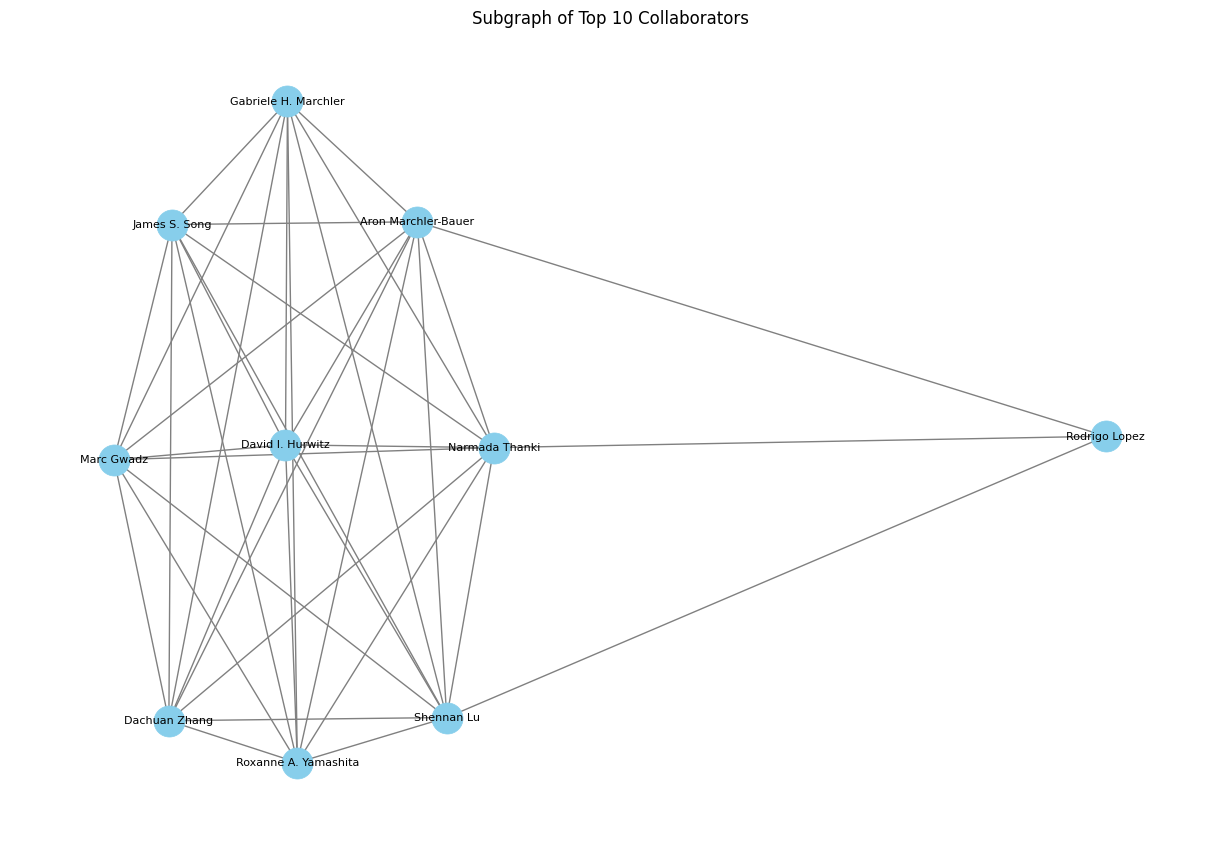

In [ ]:
# Extracting the top 10 collaborators based on collaboration weight
top_10_collaborators = sorted(collaboration_graph.nodes(), key=lambda x: sum(collaboration_graph[x][neighbor]['weight'] for neighbor in collaboration_graph.neighbors(x)), reverse=True)[:10]

# Creating a subgraph for the top 10 collaborators
subgraph_top_10 = collaboration_graph.subgraph(top_10_collaborators)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph_top_10, k=0.3)  # Layout for visualization
edge_weights_top_10 = [subgraph_top_10[u][v]['weight'] for u, v in subgraph_top_10.edges()]
nx.draw(subgraph_top_10, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=500, edge_color='gray', linewidths=0.5)
plt.title('Subgraph of Top 10 Collaborators')
plt.show()

For smooth visualization , we consider plotting a sub graph for top 10 collaborators and found the respective names of the authors as the top collboartors having relationship.

## **2. Controlling System**

### **2.1 Backend Implementation**

**1. Functionality - Graph's features**

The graph_features function calculates key features (as instructed) of a given graph and returns a summary in a pandas DataFrame. It includes the number of nodes, number of edges, graph density, degree distribution, average degree, and a density classification.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def graph_features(graph, graph_name):

    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)

    # Graph degree distribution
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_distribution = {degree: degree_sequence.count(degree) for degree in set(degree_sequence)}

    # Average degree
    avg_degree = np.mean(list(dict(graph.degree()).values()))

    # Graph hubs (nodes with degrees greater than the 95th percentile)
    degree_percentile_95 = np.percentile(list(dict(graph.degree()).values()), 95)
    hubs = [node for node, degree in dict(graph.degree()).items() if degree > degree_percentile_95]

    # Graph density classification
    density_classification = "dense" if density >= 0.5 else "sparse"

    # Constructing the result dictionary
    result_dict = {
        "Graph Name": graph_name,
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Graph Density": density,
        "Graph Degree Distribution": degree_distribution,
        "Average Degree": avg_degree,
        "Graph Hubs": hubs,
        "Graph Density Classification": density_classification
    }

    return result_dict


In [143]:
citation_features = graph_features(citation_graph, "Citation Graph")
table_data = list(citation_features.items())
max_value_length = 15
keys_to_limit_length = ["Graph Degree Distribution", "Graph Hubs"]
processed_table_data = [
    (key, str(value)[:max_value_length]) if key in keys_to_limit_length else (key, value)
    for key, value in table_data
]

# Display the table using tabulate
print(tabulate(processed_table_data, headers=["Feature", "Value"], tablefmt="grid"))

+------------------------------+-----------------------+
| Feature                      | Value                 |
+==============================+=======================+
| Graph Name                   | Citation Graph        |
+------------------------------+-----------------------+
| Number of Nodes              | 9429                  |
+------------------------------+-----------------------+
| Number of Edges              | 52289                 |
+------------------------------+-----------------------+
| Graph Density                | 0.0005882001442304685 |
+------------------------------+-----------------------+
| Graph Degree Distribution    | {1: 597, 2: 681       |
+------------------------------+-----------------------+
| Average Degree               | 11.091101919609715    |
+------------------------------+-----------------------+
| Graph Hubs                   | [2151103935, 16       |
+------------------------------+-----------------------+
| Graph Density Classification 

In [144]:

collaboration_features = graph_features(collaboration_graph, "Collaboration Graph")
table_data2 = list(collaboration_features.items())

max_value_length = 15

keys_to_limit_length = ["Graph Degree Distribution", "Graph Hubs"]

processed_table_data2 = [
    (key, str(value)[:max_value_length]) if key in keys_to_limit_length else (key, value)
    for key, value in table_data2
]


print(tabulate(processed_table_data2, headers=["Feature", "Value"], tablefmt="grid"))


+------------------------------+------------------------+
| Feature                      | Value                  |
+==============================+========================+
| Graph Name                   | Collaboration Graph    |
+------------------------------+------------------------+
| Number of Nodes              | 16485                  |
+------------------------------+------------------------+
| Number of Edges              | 52284                  |
+------------------------------+------------------------+
| Graph Density                | 0.00038481079289614725 |
+------------------------------+------------------------+
| Graph Degree Distribution    | {1: 2894, 2: 32        |
+------------------------------+------------------------+
| Average Degree               | 6.343221110100091      |
+------------------------------+------------------------+
| Graph Hubs                   | ['Andrew Y. Ng'        |
+------------------------------+------------------------+
| Graph Densit

From the above results it can be seen for both of the graphs , the density classification is sparse meaning that, is one with relatively few edges compared to the maximum possible number. This imply that there are fewer connections or relationships between nodes in the graph.

Note the Graph hub and graph degree distribution has been restricted to print only 15 charaters to increase the readability.

**2. Functionality - Node's Contribution**

The analyze_node_contribution assesses the centrality measures of a specific node in a given graph and returns the results as a dictionary. The centrality measures include Betweenness Centrality, PageRank Centrality, Closeness Centrality, and Degree Centrality.

In [ ]:
import networkx as nx

def analyze_node_contribution(graph, node, graph_name):

    centrality_results = {
        "Betweenness Centrality": nx.betweenness_centrality(graph)[node],
        "PageRank Centrality": nx.pagerank(graph)[node],
        "Closeness Centrality": nx.closeness_centrality(graph)[node],
        "Degree Centrality": nx.degree_centrality(graph)[node]
    }

    return centrality_results


In [ ]:
graph_name = "citation"
node_to_analyze = 2151103935
node_contribution = analyze_node_contribution(citation_graph, node_to_analyze, graph_name)
print(node_contribution)


{'Betweenness Centrality': 0.000891170177372276, 'PageRank Centrality': 0.0006826772511955322, 'Closeness Centrality': 0.031388213130515, 'Degree Centrality': 0.015273652948663554}


From the result it can be seen that the node **2151103935** has the above centrality results. Since there are **9429** nodes in the **citation_graph** , the centrality measures with the above metrics will for sure gives *an indication of how central or important a node is within the graph*.

**3. Functionality 3 - Shortest ordered walk**

The shortest_ordered_walk() takes collaboration graph and a sequence of authors as an input. It validates that all authors in the sequence exist as nodes in the graph. Then, it checks if there is a path between consecutive authors in the sequence. If a path exists, it finds the shortest path and accumulates the papers crossed along that path. Finally, it returns the list of papers crossed during the shortest ordered walk or returns an error message if there are invalid authors or no path between consecutive authors.

In [ ]:
def shortest_ordered_walk(collaboration_graph, authors_sequence):
    # Validate that all authors in the sequence are nodes in the collaboration graph
    if all(author in collaboration_graph.nodes for author in authors_sequence):
        current_papers_crossed = []
        for i in range(len(authors_sequence) - 1):
            source_author = authors_sequence[i]
            target_author = authors_sequence[i + 1]

            # Check if there is a path between source and target authors
            if nx.has_path(collaboration_graph, source_author, target_author):
                # Find the shortest path
                shortest_path = nx.shortest_path(collaboration_graph, source_author, target_author)
                # Extend the list of papers crossed
                current_papers_crossed.extend(collaboration_graph[shortest_path[0]][shortest_path[1]]['papers'])
            else:
                return "There is no such path."

        return current_papers_crossed
    else:
        return "Invalid authors in the sequence."


In [ ]:
authors_sequence = ["Rodrigo Lopez", "Shennan Lu", "James S. Song"]
result = shortest_ordered_walk(collaboration_graph, authors_sequence)
print(result)


['1843054844', '1924854984', '1976325156', '1985512202', '1998490996', '2001297798', '2004622806', '2014719716', '2017608260', '2055193239', '2101291993', '2106383137', '2107158607', '2107785922', '2110256992', '2111973517', '2128601422', '2128653811', '2136632285', '2140718072', '2153544371', '2156465034', '2158605937', '2161241566', '2164461702', '2179537696', '2179575365', '2223549218', '2224056471', '2230655163', '2320168961', '2343509590', '2464717012', '2465681871', '2739999456', '2004589024', '2035333716', '2096525273', '2103461849', '2124285343', '2141885858', '2152517415', '2155606054', '1947762817', '1976325156', '2004589024', '2004622806', '2017608260', '2091506983', '2099419827', '2147526198', '2169929748', '1947762817', '2004589024', '2096234478', '2096525273', '2124285343', '2128653811', '2133666768', '2141885858', '2152517415', '2155606054', '1976325156', '2004589024', '2004622806', '2017608260', '2153544371', '2169929748', '2224056471', '2557496587', '2004589024', '2055

from the result we can see the list of papers crossed during the shortest ordered walk through the collaboration graph for the given sequence of authors ("Rodrigo Lopez", "Shennan Lu", "James S. Song"). The papers are represented by their respective IDs, and the list shows the order in which they were encountered during the walk.

### Chat GPT shortest path implementation

In [ ]:
import networkx as nx

def dijkstra_shortest_ordered_walk(graph, start, end, sequence):
    try:
        shortest_path = nx.shortest_path(graph, source=start, target=end, weight='weight')
        shortest_papers = set()

        for i in range(len(shortest_path) - 1):
            edge_data = graph.get_edge_data(shortest_path[i], shortest_path[i + 1])
            neighbor_papers = edge_data.get('papers', set())
            shortest_papers.update(neighbor_papers)

        return list(shortest_papers)

    except nx.NetworkXNoPath:
        return "There is no such path."

In [ ]:
start_author = "Rodrigo Lopez"
end_author = "James S. Song"
authors_sequence = ["Rodrigo Lopez", "Shennan Lu", "James S. Song"]


result = dijkstra_shortest_ordered_walk(collaboration_graph, start_author, end_author, authors_sequence)
print(f"The papers crossed in the shortest ordered walk are: {result}")

The papers crossed in the shortest ordered walk are: ['2136632285', '1924854984', '2465681871', '2055193239', '2096525273', '2107785922', '2155606054', '2230655163', '2161241566', '2103461849', '2014719716', '2153544371', '2004589024', '2101291993', '2179537696', '2179575365', '1976325156', '2156465034', '2152517415', '2164461702', '2739999456', '2110256992', '2128653811', '1985512202', '2224056471', '2140718072', '2107158607', '1843054844', '2004622806', '2111973517', '2464717012', '1998490996', '2141885858', '2158605937', '2035333716', '2320168961', '2106383137', '2128601422', '2223549218', '2017608260', '2001297798', '2124285343', '2343509590']


**4. Functionality - Disconnecting Graphs**

To solve this functionality we decided to use a "Breadth-first search" approach. The bfs function written down execute the algorithm, so that min_disconnect() can use it in order to calculate the minimum number of edges to erase to obtain two disconnected subgraphs.

In [ ]:
from collections import deque

def bfs(graph, start, end):
    visited = set()
    queue = deque([(start, 0)])

    while queue:
        current_node, distance = queue.popleft()
        if current_node == end:
            return distance

        if current_node not in visited:
            visited.add(current_node)
            for neighbor, weight in graph.get(current_node, {}).items():
                queue.append((neighbor, distance + 1))

    return float('inf')

def min_disconnect(collaboration_graph, authorA, authorB, N):
    # Get top N authors by degree
    top_authors = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:int(N)]

    # Extract nodes and create a subgraph
    aut = []
    for author in top_authors:
        aut.append(author[0])

    aut_g = collaboration_graph.subgraph(aut)

    # Get nodes with at least two edges
    top_authors = []
    for node, degree in aut_g.degree():
        if degree > 1:
            top_authors.append(node)

    top_nodes = [author for author in top_authors if author in collaboration_graph]
    graph_N = {node: collaboration_graph[node] for node in top_nodes}

    # Find minimum distance with bfs
    min_distance = bfs(graph_N, authorA, authorB)

    # If there is no connection between the nodes, the function returns -1
    if min_distance == float('inf'):
        return -1, graph_N

    # If there is a link, the solution is min_distance
    min_edges_to_disconnect = min_distance

    return min_edges_to_disconnect, graph_N


We select two casual authors to try wether the function works

In [ ]:
top_10_collaborators

['Aron Marchler-Bauer',
 'David I. Hurwitz',
 'Gabriele H. Marchler',
 'James S. Song',
 'Roxanne A. Yamashita',
 'Shennan Lu',
 'Narmada Thanki',
 'Marc Gwadz',
 'Dachuan Zhang',
 'Rodrigo Lopez']

In [132]:
min_edges_result,graph=min_disconnect(collaboration_graph,top_10_collaborators[2],top_10_collaborators[3],100)
print(min_edges_result)

1


This example usage results to tells that we need to remove at least one edge in order to disconnect the graphs for these two authors

**5. Functionality- Extracting Communities**

The objective of this functionality is extract communities in the citation_grap. We define communities as connected components of a graph, so we proceed by checking if the input graph is connected and then if the check is passed we compute:
* The minimum number of edges that should be removed to form communities
* A list of communities, each containing a list of papers that belong to them.
* Whether the Paper_1 and Paper_2 belongs to the same community.

In [ ]:
def find_communities(graph, node1, node2):
    # We need to work on an undirected graph so we change the original one to an undirected copy
    undirected_graph = graph.to_undirected()

    if nx.number_connected_components(undirected_graph) > 1:
        print("The graph is not fully connected!")
        return 0, [], False, None

    # We compute the initial number of edges
    initial_edge_count = undirected_graph.number_of_edges()

    # We calculate the betweenness centrality for each edge...
    edge_betweenness_centrality = nx.edge_betweenness_centrality(undirected_graph)

    # ...Then we sort them in descending order
    sorted_edges = sorted(edge_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

    # We proceed by removing edges until the graph has more than one connected component
    while nx.number_connected_components(undirected_graph) == 1:
        edge_to_remove = sorted_edges.pop(0)[0]
        undirected_graph.remove_edge(*edge_to_remove)

    # The connected components are the communities
    communities = list(nx.connected_components(undirected_graph))

    # We check if the two input nodes belong to the same community
    in_same_community = any({node1, node2} <= community for community in communities)

    # We compute the minimum number of edges to remove
    final_edge_count = undirected_graph.number_of_edges()

    graph_copy = undirected_graph.copy()

    # Output customization:
    print("Initial number of edges:", initial_edge_count)
    print("Number of edges removed:", initial_edge_count - final_edge_count)
    print("Final number of edges:", final_edge_count)

    if not communities:
        print("No communities found.")
    else:
        print("Communities found:", communities)

    print(f"{node1} and {node2} are {'in the same community' if in_same_community else 'not in the same community'}")

    return initial_edge_count - final_edge_count, communities, in_same_community, graph_copy


In [ ]:
ex=list(citation_graph.nodes())
min, cm, is_cm, g_copy = find_communities(citation_graph.copy(), ex[0], ex[23])

The graph is not fully connected!


The graph is not connected so we decided to use only the largest connected component

In [ ]:
# We find the strongly connected components
strongly_connected_components = nx.strongly_connected_components(citation_graph)

# From the strongly connected components we select the largest...
giant_component = max(strongly_connected_components,key=len)

# We create the subgraph containing only the nodes and edges of the giant_component
citation_conn = citation_graph.subgraph(giant_component)

We proceed by running some examples

In [ ]:
ex=list(citation_conn.nodes())
min, cm, is_cm, g_copy = find_communities(citation_conn.copy(), ex[0], ex[12])

Initial number of edges: 230
Number of edges removed: 28
Final number of edges: 202
Communities found: [{2037227137, 2144172034, 1686810756, 2161381512, 2134670479, 2950635152, 2613718673, 1903029394, 2155541015, 2179352600, 2133564696, 2294059674, 1524680991, 1799366690, 2949888546, 2951548327, 2095705004, 1591801644, 2951912364, 2062118960, 1976948919, 2124592697, 1836465849, 2123024445, 2949117887, 2016053056, 2117539524, 2963173190, 1536680647, 2097117768, 2950094539, 2102605133, 2952186574, 2950179405, 2618530766, 2156303437, 1677182931, 2172140247, 7746136, 1948751323, 2145287260, 2949650786, 2163922914, 1998808035, 2952122856, 2952186347, 104184427, 2113325037, 1527575280, 2155893237, 154472438, 2130942839, 1861492603, 2183182206, 1849277567}, {2157331557}]
2037227137 and 1524680991 are in the same community


In [ ]:
ex=list(citation_conn.nodes())
min, cm, is_cm, g_copy = find_communities(citation_conn.copy(), "2161381512", "2157331557")

Initial number of edges: 230
Number of edges removed: 28
Final number of edges: 202
Communities found: [{2037227137, 2144172034, 1686810756, 2161381512, 2134670479, 2950635152, 2613718673, 1903029394, 2155541015, 2179352600, 2133564696, 2294059674, 1524680991, 1799366690, 2949888546, 2951548327, 2095705004, 1591801644, 2951912364, 2062118960, 1976948919, 2124592697, 1836465849, 2123024445, 2949117887, 2016053056, 2117539524, 2963173190, 1536680647, 2097117768, 2950094539, 2102605133, 2952186574, 2950179405, 2618530766, 2156303437, 1677182931, 2172140247, 7746136, 1948751323, 2145287260, 2949650786, 2163922914, 1998808035, 2952122856, 2952186347, 104184427, 2113325037, 1527575280, 2155893237, 154472438, 2130942839, 1861492603, 2183182206, 1849277567}, {2157331557}]
2161381512 and 2157331557 are not in the same community


from the results we can see that the id 2161381512 and 2157331557 are not in the same community , it means that there is no direct collaboration or connection between the authors of these two papers within the collaboration graph.

### **2.2. Frontend Implementation**

**Visualization 1- Visualize graph features**

In [ ]:
import pandas as pd
import seaborn as sns

def visualize_graph_features(graph, graph_name, num_nodes_to_display=20):

    general_info = pd.DataFrame({
        "Number of Nodes": [graph.number_of_nodes()],
        "Number of Edges": [graph.number_of_edges()],
        "Density": [nx.density(graph)],
        "Average Degree": [np.mean(list(dict(graph.degree()).values()))],
        "Network Type": ["Dense" if nx.density(graph) >= 0.5 else "Sparse"]
    })

    # Print tabulated general information
    print(f"General Information for {graph_name}:\n")
    print(tabulate(general_info, headers="keys", tablefmt="pretty"))

    # Hubs Table
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_percentile_95 = np.percentile(degree_sequence, 95)
    hubs = [(node, degree) for node, degree in dict(graph.degree()).items() if degree > degree_percentile_95]
    hubs_table = pd.DataFrame(hubs, columns=["Hub Node", "Degree"])
    print(f"\nHubs for {graph_name}:\n")
    print(hubs_table)

    # Citation Distribution Plot (for Citation Graph)
    if graph_name == 'Citation Graph':
        plt.figure(figsize=(12, 6))
        sns.histplot(degree_sequence[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Citations Received by Papers")
        plt.xlabel("Number of Citations")
        plt.ylabel("Frequency")
        plt.show()

        print ()

        # Given Citation Distribution Plot (for Citation Graph)
        given_citations = [graph.out_degree(node) for node in graph.nodes()]
        plt.figure(figsize=(12, 6))
        sns.histplot(given_citations[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Given Citations by Papers")
        plt.xlabel("Number of Given Citations")
        plt.ylabel("Frequency")
        plt.show()

    # Collaboration Count Plot (for Collaboration Graph)
    elif graph_name == 'Collaboration Graph':
        collaboration_counts = [graph.degree(node) for node in graph.nodes()]
        plt.figure(figsize=(12, 6))
        sns.histplot(collaboration_counts[:num_nodes_to_display], bins=15, kde=True)
        plt.title("Distribution of Collaboration Counts of Authors")
        plt.xlabel("Number of Collaborations")
        plt.ylabel("Frequency")
        plt.show()

General Information for Citation Graph:

+---+-----------------+-----------------+-----------------------+--------------------+--------------+
|   | Number of Nodes | Number of Edges |        Density        |   Average Degree   | Network Type |
+---+-----------------+-----------------+-----------------------+--------------------+--------------+
| 0 |      9429       |      52289      | 0.0005882001442304685 | 11.091101919609715 |    Sparse    |
+---+-----------------+-----------------+-----------------------+--------------------+--------------+

Hubs for Citation Graph:

       Hub Node  Degree
0    2151103935     144
1    1676552347      32
2    2024668293      34
3    2109863423      35
4    2111308925      47
..          ...     ...
455  2044762091      31
456  2107561590      32
457  2115167851      64
458  2277195237      40
459  2624989916      32

[460 rows x 2 columns]


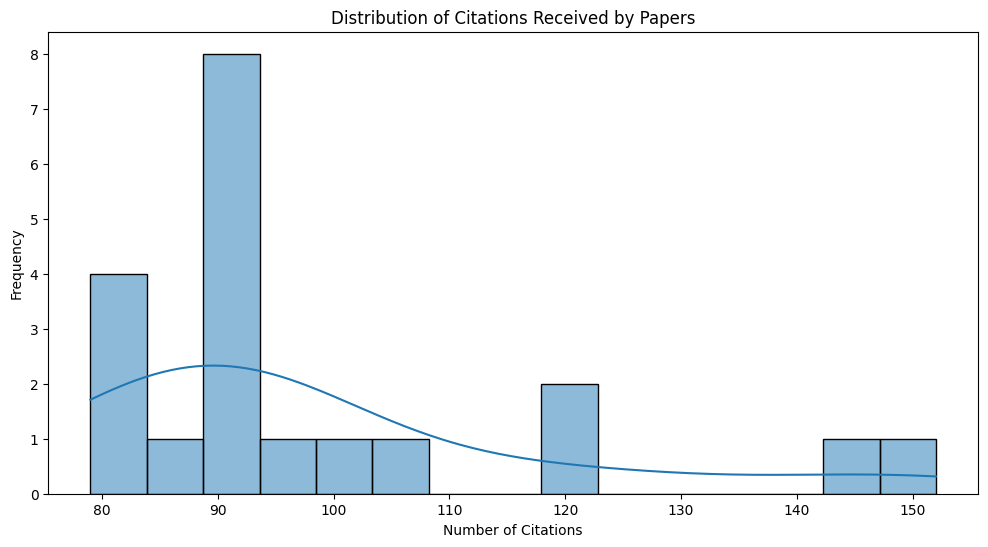

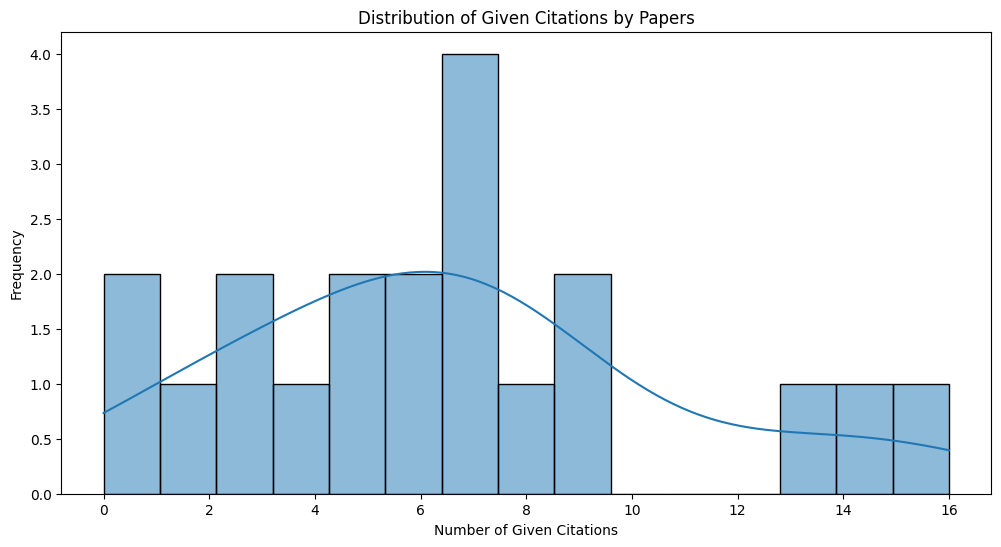

In [ ]:
graph_name = "Citation Graph"
visualize_graph_features(citation_graph, graph_name)

from the report we have above , we can see the measures as we have seen in the functionality 1. Visualizing the plots, from first we can see high degree of inequality in the citation network, with a small number of papers receiving a disproportionate amount of attention.while with the second plot, distribution of given citations is also highly skewed, with the vast majority of papers having a very low number of given citations.

The skewedness could be because of the dataset we created for our analysis from our main dataset.

**Visualization 2 - Visualize the node's contribution**

In [ ]:
from tabulate import tabulate
def visualize_node_contribution(graph, node, graph_name):

    centrality_results = analyze_node_contribution(graph, node, graph_name)

    # Display centrality values in a table
    table_data = [(measure, value) for measure, value in centrality_results.items()]
    table_headers = ["Centrality Measurement", "Centrality Value"]

    print(f"\nCentrality Measurements for Node {node} in {graph_name}:")
    print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))

In [ ]:
graph_name = "Citation Graph"

# User input: specify a node for which centrality will be calculated
node_to_analyze = int(input("Enter the ID of the node you want to analyze: "))
visualize_node_contribution(citation_graph, node_to_analyze , graph_name)

Enter the ID of the node you want to analyze: 2151103935

Centrality Measurements for Node 2151103935 in Citation Graph:
+------------------------+-----------------------+
| Centrality Measurement |   Centrality Value    |
+------------------------+-----------------------+
| Betweenness Centrality | 0.000891170177372276  |
|  PageRank Centrality   | 0.0006826772511955322 |
|  Closeness Centrality  |   0.031388213130515   |
|   Degree Centrality    | 0.015273652948663554  |
+------------------------+-----------------------+


**Visualization 3 - Visualize the shortest-ordered route**

The visualize_shortest_ordered_route() function are defined to work on the subgraph which is based on top 10 collaborators. This is because to make the visualization work better. The function also displays the papers that crossed in the shortest walk along with its count . The nodes in the shortest walk are in red color and edges are in yellow.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_shortest_ordered_route(collaboration_graph, authors_sequence, selected_authors):

    subgraph = collaboration_graph.subgraph(selected_authors)
    result = shortest_ordered_walk(subgraph, authors_sequence)
    print("Papers crossed in the shortest walk:", result)

    # Count the papers crossed in the shortest walk
    papers_count = len(result)
    print("Number of papers crossed in the shortest walk:", papers_count)


    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True)

    # Identify the nodes and edges in the shortest walk
    for i in range(len(authors_sequence) - 1):
        source_author = authors_sequence[i]
        target_author = authors_sequence[i + 1]
        shortest_path = nx.shortest_path(subgraph, source_author, target_author)

        # Highlight nodes and edges in the shortest walk
        nx.draw_networkx_nodes(subgraph, pos, nodelist=shortest_path, node_color='r')
        nx.draw_networkx_edges(subgraph, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='yellow', width=2)

    plt.show()


Papers crossed in the shortest walk: ['1843054844', '1924854984', '1976325156', '1985512202', '1998490996', '2001297798', '2004622806', '2014719716', '2017608260', '2055193239', '2101291993', '2106383137', '2107158607', '2107785922', '2110256992', '2111973517', '2128601422', '2128653811', '2136632285', '2140718072', '2153544371', '2156465034', '2158605937', '2161241566', '2164461702', '2179537696', '2179575365', '2223549218', '2224056471', '2230655163', '2320168961', '2343509590', '2464717012', '2465681871', '2739999456', '2004589024', '2035333716', '2096525273', '2103461849', '2124285343', '2141885858', '2152517415', '2155606054', '1947762817', '1976325156', '2004589024', '2004622806', '2017608260', '2091506983', '2099419827', '2147526198', '2169929748', '1947762817', '2004589024', '2096234478', '2096525273', '2124285343', '2128653811', '2133666768', '2141885858', '2152517415', '2155606054', '1976325156', '2004589024', '2004622806', '2017608260', '2153544371', '2169929748', '222405647

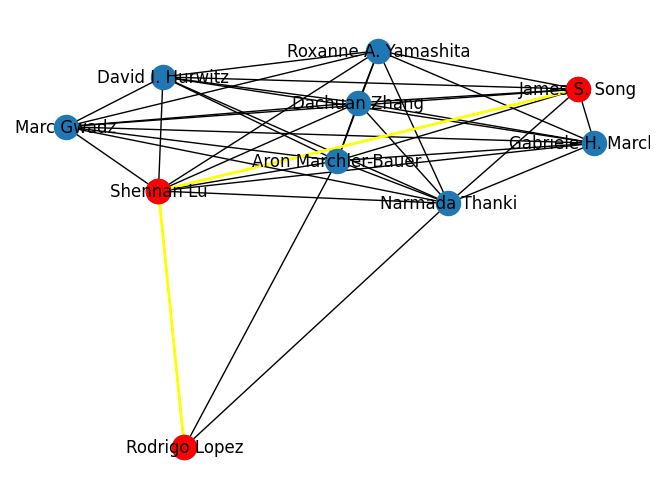

In [ ]:
selected_authors = top_10_collaborators
authors_sequence = ["Rodrigo Lopez", "Shennan Lu", "James S. Song"]
visualize_shortest_ordered_route(collaboration_graph,authors_sequence, selected_authors)

From the above graph we can see that the nodes which  are in the shortest walk are for sure the authors sequence we considered which are represented in red color. The edges are represented in yellow color and they are James to Aron, Aron to shennan and shennan to rodrigo. The total papers crossed in the short walk is 87.

**Visualization 4 - Visualize the disconnected graph**

In [134]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_disconnected_graph(original_subgraph, disconnected_subgraph, edges_to_visualize):
    plt.figure(figsize=(12, 6))

    print(f"Number of links to disconnect: {len(edges_to_visualize)}")

    # Plot the original subgraph
    plt.subplot(1, 3, 1)
    pos_original = nx.spring_layout(original_subgraph)
    nx.draw(original_subgraph, pos_original, with_labels=True, font_size=8, font_color='black', node_size=300)
    plt.title('Original Subgraph')

    # Plot the subgraph after removing the links
    plt.subplot(1, 3, 2)
    pos_disconnected = nx.spring_layout(disconnected_subgraph)
    nx.draw(disconnected_subgraph, pos_disconnected, with_labels=True, font_size=8, font_color='black', node_size=300)
    plt.title('Disconnected Subgraph')

    # Plot the edges to be removed
    plt.subplot(1, 3, 3)
    pos_original = nx.spring_layout(original_subgraph)
    nx.draw(original_subgraph, pos_original, with_labels=True, font_size=8, font_color='black', node_size=300)
    nx.draw_networkx_edges(original_subgraph, pos_original, edgelist=edges_to_visualize, edge_color='r', width=2)
    plt.title('Edges to Disconnect')

    # Show the plot
    plt.show()

In [ ]:
selected_authors = top_10_collaborators
subgraph = collaboration_graph.subgraph(selected_authors)

min_edges_result, disconnected_subgraph = min_disconnect(collaboration_graph, top_10_collaborators[2],top_10_collaborators[3], 500)
edges_to_visualize = disconnected_subgraph.edges
visualize_disconnected_graph(subgraph, disconnected_subgraph, edges_to_visualize)

Upon visualization , we got the number of disconnected links as 0 and the plot shows that as seen below where the comparision between original graph and graph after removing links has no difference . This might be because of the edges we considered to be in the dictionaries values that is implemented from the functionality 4.


**Visualization 5 - Visualize the communities**

This visualization function should:
* Print the number of links that should be removed to have the communities
* A table depicting the communities and the papers that belong to each community
* Plot the original graph
* Plot the graph showing the communities in the network
* Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def visualize_communities(input_graph, start_node, end_node):
    min_edge_count, communities, in_same_community, final_graph_copy = find_communities(input_graph, start_node, end_node)

    print("------------------------------- TABLE OF COMMUNITIES -------------------------------")

    # We formatted communities for table display
    communities_display = []
    for comm in communities:
        if len(comm) > 4:
            communities_display.append(list(comm)[:4] + ['...'])
        else:
            communities_display.append(list(comm))

    # We create a dataframe to improve the visualization
    df = pd.DataFrame({"Index": range(len(communities_display)), "Community": communities_display})

    # Print the table
    print(df)
    print("---------------------------------------------------------------------------------")


    initial_layout = nx.spring_layout(input_graph)
    community_layout = nx.spring_layout(input_graph)
    final_layout = nx.spring_layout(final_graph_copy)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    axes[0].set_title('Original Graph')
    axes[1].set_title('Graph Showing the Communities')
    axes[2].set_title('Final Graph')

    # Graph 1
    for node in input_graph.nodes:
        community_node_colors = ['red' if node == start_node or node == end_node else 'skyblue']
    nx.draw(input_graph, pos=initial_layout, ax=axes[0], with_labels=False, node_color=community_node_colors, edge_color='gray')

    # Graph 2
    community_node_colors = []
    for node in input_graph.nodes:
        color = 'red' if node == start_node or node == end_node else 'skyblue'
        community_node_colors.append(color)
    nx.draw(input_graph, pos=community_layout, node_color=community_node_colors, ax=axes[1], with_labels=False, edge_color='gray')

    # Graph 3
    node_labels = {}
    final_node_colors = []
    for comm_id, nodes in enumerate(communities):
        for node in nodes:
            node_labels[node] = f'Cm.{comm_id}'
            color = 'red' if node == start_node or node == end_node else 'skyblue'
            final_node_colors.append(color)

    nx.draw(final_graph_copy, pos=final_layout, node_color=final_node_colors, cmap=plt.cm.rainbow, labels=node_labels, ax=axes[2], with_labels=False, edge_color='gray')

    plt.show()


Initial number of edges: 230
Number of edges removed: 28
Final number of edges: 202
Communities found: [{2037227137, 2144172034, 1686810756, 2161381512, 2134670479, 2950635152, 2613718673, 1903029394, 2155541015, 2179352600, 2133564696, 2294059674, 1524680991, 1799366690, 2949888546, 2951548327, 2095705004, 1591801644, 2951912364, 2062118960, 1976948919, 2124592697, 1836465849, 2123024445, 2949117887, 2016053056, 2117539524, 2963173190, 1536680647, 2097117768, 2950094539, 2102605133, 2952186574, 2950179405, 2618530766, 2156303437, 1677182931, 2172140247, 7746136, 1948751323, 2145287260, 2949650786, 2163922914, 1998808035, 2952122856, 2952186347, 104184427, 2113325037, 1527575280, 2155893237, 154472438, 2130942839, 1861492603, 2183182206, 1849277567}, {2157331557}]
2037227137 and 2144172034 are in the same community
------------------------------- TABLE OF COMMUNITIES -------------------------------
   Index                                          Community
0      0  [2037227137, 21441

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


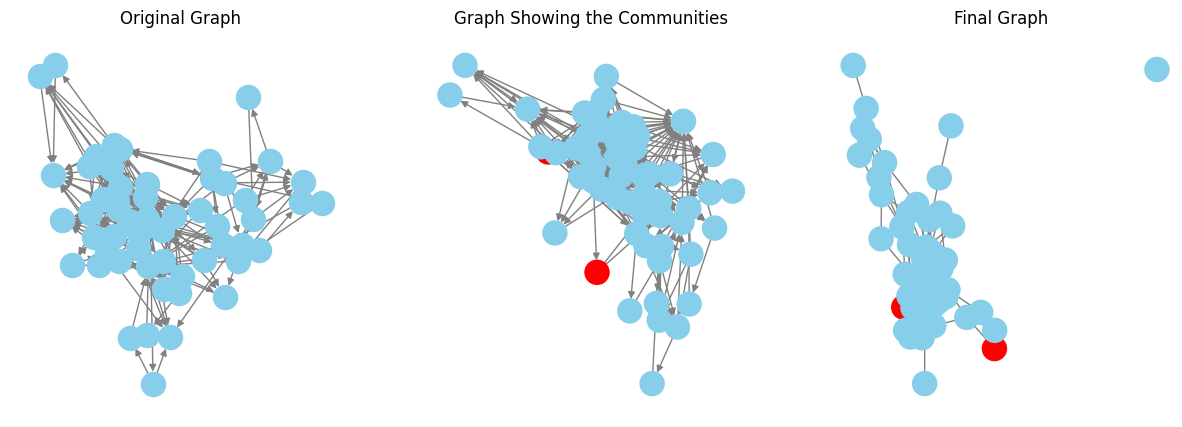

In [ ]:
visualize_communities(citation_conn.copy(),ex[0],ex[1])

## **4. Command Line Question (CLQ)**

We created a citation_graph.txt file in order to use it in the terminal to answer the command line questions


In [ ]:
import networkx as nx

citation_graph = nx.DiGraph()

citation_graph.add_edges_from(citation_edges)


with open("citation_graph.txt", "w") as file:
    for edge in citation_graph.edges():
        file.write(f"{edge[0]} {edge[1]}\n")
# The file will have the nodes' ids paired when there is a link between the two of them

With the the "CommandLine.sh" file we managed to answer the questions, the output obtained is written below: (For the code look at the .sh file in the repo)

Upon examining the output from the command line shell script, we came to know that

- the node with the id "2076063813" is the one that acts like an important connector with a degree = 131.

- the node's degree changes between a minimum of 1 and a maximum of 131.

- The graph is not strongly connected. Calculating average shortest path lengths for the connected components: Average Length of Shortest Paths (Total): 0.032781274999290184

For the third part of the CLQ, we checked how much the graph is connected, the output tells that the graph is not strongly connected so we proceeded to analyze the connected components and then finding their average Shortest Path Length.

<img src="Command_line_output.png" alt="Image Alt Text" width="600"/>



## **5. Algorithmic Questions (AQ)**

In [1]:
# Libraries
import json
import numpy as np
from google.colab import drive
from collections import deque
import matplotlib.pyplot as plt
from tqdm import tqdm

drive.mount(r'/content/drive',force_remount = True)
%cd /content/drive/MyDrive/algo

Mounted at /content/drive
/content/drive/MyDrive/algo


In [2]:
# Load data
with open("algo_inputs.json", 'r') as json_file:
    inputs = json.load(json_file)

input_1 = inputs["input_1"]
input_2 = inputs["input_2"]

# 5. Algorithmic Questions (AQ)

## Part A

A sports club hires you to create a team for the National Sports Championship. Every Italian Region sends its best $M$
 athletes to compete in an intense 2-day sports event, and Rome is no exception!

The trainers of Team Rome need to carefully choose the best $M$ athletes from a pool of $N$
 candidates. Each athlete is uniquely identified by a number from 1 to $N$
 and possesses a set of $S$
 sports skills. Each skill is represented by a $3$-character string with only uppercase letters and a non-negative integer indicating the athlete's proficiency in that skill (always greater than $0$).

The trainers have extensively studied the competition format and established an optimal set of (possibly repeated) skills the team should possess to ensure the best possible performance. Each of the ten selected athletes will be assigned one of these skills as their role within the team.

The team's overall score is the sum of the skill scores of its members in the roles they have been assigned. Other skills of each athlete do not contribute to the team's score.

Your task is to determine the maximum possible global score for Team Rome, given the list of candidates.


### 1) Implement an algorithm to solve the described mentioned problem.



The earlier sports team selection challenge aligns with the broader framework known as the **assignment problem**.


<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*O-O-U4st14g_0oPu719PJw.png" alt="Alt text">

In its fundamental structure, this problem involves a set of **agents** and a set of **tasks**.

Each agent has the capability to be assigned to any task, incurring a specific **cost** associated with the agent-task pairing.

The primary objective is to efficiently allocate agents to tasks in a manner **minimizes the total cost of the assignments**.



#### Adaptations
The two problems seems really close to each other, but we need to point out some differences:
- In our problem we are asked to maximise a score, not minimize a cost;
- In our problem the numbers of agents differs from the number of tasks.

Those two differences can be easily solved:
- We will use the **negative score** as the cost function;
- We will add dummy tasks (or agents if $M > N$) with high assigning cost.


Let's apply this tranformations into the firs input:

In [3]:
# Get first input nd show theira
athletes = input_1["athletes"]
categories = input_1["categories"]
N, M, S = input_1["dimensions"]

# Print their format
print(f"N = {N}, M = {M}, S = {S}")
print(f"\nAthletes:\n\n {athletes}")
print(f"\nCategories:\n\n {categories}")

N = 14, M = 10, S = 1

Athletes:

 {'1': {'BSK': 98}, '2': {'ATH': 14}, '3': {'HCK': 82}, '4': {'HCK': 9}, '5': {'FTB': 90}, '6': {'ATH': 52}, '7': {'HCK': 95}, '8': {'TEN': 85}, '9': {'RGB': 46}, '10': {'SWM': 16}, '11': {'VOL': 32}, '12': {'SOC': 41}, '13': {'SWM': 59}, '14': {'SWM': 34}}

Categories:

 ['SWM', 'VOL', 'ATH', 'VOL', 'VOL', 'BSK', 'HCK', 'BSK', 'SWM', 'BSK']


In [4]:
# Since N > M we will add dummy categories. We will cal them "Null"
modified_categories = categories + ["Null"] * (N - M)
print(modified_categories)

['SWM', 'VOL', 'ATH', 'VOL', 'VOL', 'BSK', 'HCK', 'BSK', 'SWM', 'BSK', 'Null', 'Null', 'Null', 'Null']


Here we create the cost matrix.

Now $N = M$, hence it will be a squared matrix.

Each athlete $i$ will have a $- score$ cost on taks $j$ if $j$ is in the set of tasks $S_i$. Otherwise it will have $0$ cost (which is bigger).

In [5]:
# Create the cost matrix and show it
cost_matrix = np.array([[-athletes[str(i)].get(category, 0)
                         for category in modified_categories]  for i in range(1,N+1)])

print(cost_matrix)

[[  0   0   0   0   0 -98   0 -98   0 -98   0   0   0   0]
 [  0   0 -14   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 -82   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  -9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 -52   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 -95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [-16   0   0   0   0   0   0   0 -16   0   0   0   0   0]
 [  0 -32   0 -32 -32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [-59   0   0   0   0   0   0   0 -59   0   0   0   0   0]
 [-34   0   0   0   0   0   0   0 -34   0   0   0   0   0]]


#### Solution : The Hungarian algorithm

I decided to create from scratch a classical algorithm used to solve assignment problems: the **Hungarian algorithm**.

It consists of the following steps:


- **Step 1**: Subtract the minimum value in each row from all the elements in that row: This step ensures that there is at least one zero in each row.

- **Step 2**: Subtract the minimum value in each column from all the elements in that column: Similar to Step 1, this step ensures that there is at least one zero in each column.

- **Step 3**: Find the **minimum** number of horizontal and/or vertical lines necessary to cover all the zeros in the matrix.

- **Step 4**: Check if the number of lines drawn is equal to the matrix's size. If yes, go to **Step 7**. If not, go to **Step 5**.

- **Step 5**: Find the smallest uncovered (by the lines of **Step 3**) value in the matrix. Subtract this value from all uncovered elements and add it to the elements that are covered by two lines (both a row and a column lines).

- **Step 6**: Go back to **Step 3** and repeat the process until an optimal assignment is found (obtained when the minimum number of lines equals the matrix's size).

- **Step 7**: Now each $0$ in this final matrix represent a possible optimal assignment. Chose them in order to assign to every agent one task and vice versa (this is garanteed from the optimaility condition obtained in **Step 3**).
  If there are dummy tasks or dummy agents, ignore them in the final assignment.

This is my implementation of the algorithm:

In [6]:
def hungarian_algorithm(cost_matrix):

    # Create a copy of the initial cost_matrix since we don't want to modify it
    final_cost_matrix = cost_matrix.copy()

    # Get number of agents/tasks
    n = final_cost_matrix.shape[0]

    # Step 1: Subtract the smallest element from each row
    final_cost_matrix -= np.min(final_cost_matrix, axis = 1)[:, np.newaxis]

    # Step 2: Subtract the smallest element from each column
    final_cost_matrix -= np.min(final_cost_matrix, axis = 0)

    # Initialize number of iterations
    iterations = 0

    while True:

        # Step 3: Cover the Zeros:
        # Cover the matrix with the minimum number of lines (horizontal and vertical lines) such that all zeros are covered.
        covered_rows, covered_columns = minimum_cover(final_cost_matrix)

        # Step 4: If the number of covered zeros equals the order of the matrix, an optimal assignment is found.
        # You can proceed to Step 7.
        if np.sum(covered_rows + covered_columns) == n:
            break

        # Update number of iterations
        iterations += 1

        # Step 5: Find the Smallest Uncovered Element "m", subtract this value from all uncovered elements and add it to the elements that are covered by two lines.

        # Get positions covered twice
        twice_covered_positions = np.array(np.meshgrid(np.where(covered_rows == 1),
                                                       np.where(covered_columns == 1))).T.reshape(-1, 2)
        # Get uncovered positions
        uncovered_positions = np.array(np.meshgrid(np.where(covered_rows == 0),
                                                   np.where(covered_columns == 0))).T.reshape(-1, 2)
        # Get Smallest Uncovered Element: "M"
        min_uncovered_value = np.min(final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]])

        # Subtract the minimum uncovered value from uncovered items
        final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]] = np.array(final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]]) - min_uncovered_value

        # Add the minimum uncovered value to items covered twice
        final_cost_matrix[twice_covered_positions[:, 0], twice_covered_positions[:, 1]] = np.array(final_cost_matrix[twice_covered_positions[:, 0], twice_covered_positions[:, 1]]) + min_uncovered_value

        # Step 6: Go back to Step 3

    # Step 7: do the assignment

    # Initialize assignment list
    assignment = []

    # We want to reorder our final_cost_matrix since we want to start assigning from the row that has fewer zeros
    sort_indexes = np.argsort(np.sum(final_cost_matrix == 0, axis=1))
    sorted_cost_matrix = final_cost_matrix[sort_indexes]

    # Get zeros position
    zeros = np.array(np.where(sorted_cost_matrix == 0)).T

    # Until there is a zero
    while zeros.shape[0] > 0:

        # Add assignment
        assignment.append(zeros[0])

        # Then remove all zeros in the same row or column from zeros_positions
        zeros = zeros[np.logical_and(zeros[:, 0] != zeros[0,0], zeros[:, 1] != zeros[0,1])]

    # Reorder assignment to initial order
    assignment = [(sort_indexes[i[0]], i[1]) for i in assignment]

    # Sort on the first element
    assignment = sorted(assignment, key = lambda x: x[0])

    return assignment, iterations


Within all those easy-to-code steps a monster is hiding: **Step 3**.

The problem of finding the minimum number of lines to cover all zeros of a matrix is not trivial.

Anyway, this too, is just an instance of another **well known** problem.

Before introducing it we need change the statement of our initial problem.

#### Theory recap
**Bipartite graphs**

A bipartite graph (or bigraph) is a graph whose vertices can be divided into two disjoint and independent sets $U$ and $V$, that is, every edge connects a vertex in $U$ to one in $V$.

**Vertex cover**

A vertex cover $V'$ of an undirected graph $G = (V,E)$ is a subset of $V$ such that every edge has **at least** one endpoint in the $V'$.

**Matching**

Given a graph $G = (V,E)$, a matching $M$ in $G$ is a set of pairwise non-adjacent edges, none of which are loops; that is, no two edges share common vertices.

**Konig's theorem**

In a bipartite graph, the size of the maximum matching is equal to the size of the minimum vertex cover.


#### Step 3 implementation

Let the cost matrix be $C$.
We can see the $C$ as a bipartite graph, $G$,  between the sets of *rows* and *columns*.

There is an edge between $row_i$ and $column_j$ if $C{i,j} = 0$.

In this new enviroment the problem of finding the minimum number of lines to cover all zeros of $C$ becomes finding the minimum vertex cover of $G$.

König's theorem allows us to find the minimum vertex cover by first finding the maximum matching, and then selecting in the "right" vertices:

Let $A$ and $B$ be the sets that genereate the bipartite graph $G$, and let $M$ be a maximum matching of $G$.

Let $U$ be the set of unmatched (not in $M$) vertices in $A$ (possibly empty), and let $Z$ be the set of vertices that are either in $U$ or are connected to $U$ by alternating paths (paths that alternate between edges that are in the matching and edges that are not in the matching). Then  $K = (A \setminus Z) \cup (B \cap Z)$ forms a vertex cover.

We will find the maximum matching by using the well known **Hopcroft-Karp algorithm**, shown below:


In [7]:
# Hopcroft-Karp algorithm implementation for finding maximum cardinality bipartite matching
class HopcroftKarp:
    def __init__(self, graph):
        # Initialize the Hopcroft-Karp algorithm with a bipartite graph represented as an adjacency dictionary
        self.graph = graph
        # Set of vertices in the first partition (U)
        self.U = set(graph.keys())
        # Set of vertices in the second partition (V)
        self.V = set(vertex for neighbors in graph.values() for vertex in neighbors)
        # Dictionary to store matching information for vertices in U
        self.pair_U = {u: None for u in self.U}
        # Dictionary to store matching information for vertices in V
        self.pair_V = {v: None for v in self.V}
        # Dictionary to store distances during BFS traversal
        self.distances = {}
        # Variable to store the size of the maximum matching
        self.max_matching_size = 0
        # Dictionary to store matching edges for visualization
        self.matching_edges = {}

    def bfs(self):
        # Breadth-First Search to find augmenting paths
        queue = deque()
        # Initialize distances for vertices in U and None (used for termination condition)
        for u in self.U:
            if self.pair_U[u] is None:
                self.distances[u] = 0
                queue.append(u)
            else:
                self.distances[u] = float('inf')

        # Initialize distance for None to infinity
        self.distances[None] = float('inf')

        # Explore augmenting paths using BFS
        while queue:
            u = queue.popleft()
            if self.distances[u] < self.distances[None]:
                for v in self.graph[u]:
                    if self.distances[self.pair_V[v]] == float('inf'):
                        self.distances[self.pair_V[v]] = self.distances[u] + 1
                        queue.append(self.pair_V[v])

        # Return True if an augmenting path is found, indicating the possibility of further augmentation
        return self.distances[None] != float('inf')

    def dfs(self, u):
        # Depth-First Search to explore augmenting paths and update matching
        if u is not None:
            for v in self.graph[u]:
                if self.distances[self.pair_V[v]] == self.distances[u] + 1:
                    if self.dfs(self.pair_V[v]):
                        self.pair_V[v] = u
                        self.pair_U[u] = v

                        # Add matching edges for both directions
                        self.matching_edges[u] = v
                        self.matching_edges[v] = u

                        return True

            # If no augmenting path is found, update distances and backtrack
            self.distances[u] = float('inf')
            return False

        # Return True when reaching the None node, indicating a successful augmentation
        return True

    def maximum_matching(self):
        # Main function to find the maximum cardinality matching using Hopcroft-Karp algorithm
        while self.bfs():
            for u in self.U:
                if self.pair_U[u] is None and self.dfs(u):
                    self.max_matching_size += 1

        # Return the size of the maximum matching and the matching edges
        return self.max_matching_size, self.matching_edges



Lastly, the following is my implementation of the minimum zero cover problem solution discussed above:

In [8]:
def minimum_cover(cost_matrix):

    # Get number of rows and columns
    n = cost_matrix.shape[0]

    # Initialize the sets that generate the bipartite graph.
    # They are the rows and columns, since the cost matrix is an NxN matrix they are the same set, but for
    # code necessities and clarity I decided to change the set of rows from number {1,2,...} to letters {A,B,...}
    A = {chr(i + 65) for i in range(n)}
    B = {i for i in range(n)}

    # Initialize covered rows and columns.
    # This arrays will keep track of what rows and columns have been covered
    covered_rows = np.zeros(n, dtype=int)
    covered_columns = np.zeros(n, dtype=int)

    # Define our bipartite graph between rows and columns
    bipartite_graph = {chr(i + 65) : set(np.where(cost_matrix[i,:] == 0)[0]) for i in range(n)}

    # Get the maximum matching using the Hopcroft Karp algorithm.
    hopcroft_karp = HopcroftKarp(bipartite_graph)
    maximum_matching_size, maximum_matching = hopcroft_karp.maximum_matching()

    # Now we want to recover a minimum vertex cover, using the Konig's theorem

    # Let U be the set of unmatched vertices in A:
    U = set([key for key in bipartite_graph.keys() if key not in maximum_matching.keys()])

    # Let Z be the set of vertices that are either in U or are connected to U by alternating paths
    # (paths that alternate between edges that are in the matching and edges that are not in the matching).

    # Initialize Z as an empty set
    Z = set()
    for element in U:
        # Add elements with alternating paths until there's no new entry
        backward = {element}
        while True:
            # Forward from A -> B
            forward = set().union(*[bipartite_graph[item] for item in backward])

            # If all already contained in Z break
            if forward.issubset(Z):
                break
            # Add all elements not contained in Z
            for item in forward:
                if item not in Z:
                    Z.add(item)

            # Backward from B -> A
            backward = set().union(*[maximum_matching[item] for item in forward if item in maximum_matching.keys()])

            # If all already contained in Z break
            if backward.issubset(Z):
                break
            # Add all elements not contained in Z
            for item in backward:
                if item not in Z:
                    Z.add(item)

    # Add U elements in Z
    Z = Z.union(U)

    # The minimum vertex cover now can be obtained as:

    # A \ U (rows)
    covered_rows_indexes = [ord(element) - 65 for element in A.difference(Z)]

    # B ∩ U (column)
    columns_columns_indexes = list(B.intersection(Z))

    # Set as "1" the rows and columns that have been covered
    covered_rows[covered_rows_indexes] = 1
    covered_columns[columns_columns_indexes] = 1

    return covered_rows, covered_columns

After all this theory, let's apply our algorithms on the first input:

In [9]:
# Apply hungarian algorithm on first input
optimal_assignment, _ = hungarian_algorithm(cost_matrix)

# Remove dummy variables, add categories and print it
printable_assignment = [(tup[0], categories[tup[1]]) for tup in optimal_assignment if tup[1] not in [10,11,12,13]]
print(f"\n Optimal assignment: \n {printable_assignment}\n")

# Print scores
score = np.sum([-cost_matrix[i] for i in optimal_assignment])
print(f"This assignment is optimal. It obtained {score} points")


 Optimal assignment: 
 [(0, 'BSK'), (3, 'VOL'), (4, 'VOL'), (5, 'ATH'), (6, 'HCK'), (7, 'BSK'), (8, 'BSK'), (10, 'VOL'), (12, 'SWM'), (13, 'SWM')]

This assignment is optimal. It obtained 370 points


Let's check the code on the second input:

In [11]:
# Get second input
athletes = input_2["athletes"]
categories = input_2["categories"]
N, M, S = input_2["dimensions"]


# Since the hungarian algorithm works with squared cost matrices, we need to add dummy variables for the categories.
# ( we need to have the same number of athletes and categories)
modified_categories = categories + ["Null"] * (N - M)

# Create the cost_matrix
cost_matrix = np.array([[-athletes[str(i)].get(category, 0)
                         for category in modified_categories]  for i in range(1,N+1)])

# Apply hungarian algorithm on first input
optimal_assignment, _ = hungarian_algorithm(cost_matrix)

# Remove dummy variables, add categories and print it
printable_assignment = [(tup[0] + 1, categories[tup[1]]) for tup in optimal_assignment if tup[1] not in [10,11,12,13]]
print(f"\n Optimal assignment: \n {printable_assignment}\n")

# Print score
score = np.sum([-cost_matrix[i] for i in optimal_assignment])
print(f"This assignment is optimal. It obtained {score} points")


 Optimal assignment: 
 [(1, 'BSK'), (2, 'VOL'), (5, 'BSK'), (6, 'ATH'), (7, 'HCK'), (9, 'SWM'), (10, 'BSK'), (11, 'VOL'), (13, 'SWM'), (14, 'VOL')]

This assignment is optimal. It obtained 399 points


### 2) What is the time complexity (the Big O notation) of your solution? Please provide a detailed explanation of how you calculated the time complexity.



Let $T = \max(N,M)$ be the number of athletes / categories after adding the dummy columns or rows.

Let's check the time complexity of each step of my solution:

- Create the cost matrix:
```
cost_matrix = np.array([[-athletes[str(i)].get(category, 0)
                         for category in modified_categories]  for i in range(1,N+1)])
```
For each category and athlete it is checking all its skills.
Time complexity of  $\mathcal{O}(T^2 \cdot S)$


- Step 1 and 2 of the Hungarian algorithm:
```
    # Step 1: Subtract the smallest element from each row
    final_cost_matrix -= np.min(final_cost_matrix, axis = 1)[:, np.newaxis]

    # Step 2: Subtract the smallest element from each column
    final_cost_matrix -= np.min(final_cost_matrix, axis = 0)
```
Time complexity of $\mathcal{O}(T^2)$

The **while loop** contains steps 3,4 and 5 of the Hungarian algorithm.
Let's first analyze each step indipendently:


- Step 3 of the Hungarian algorithm (`minimum_cover` function) consists of two main parts:  the Hopcroft-Karp algorithm and the recovering of the minimum cover from the maximum matching.
  - The Hopcroft-Karp time complexity is known to be $\mathcal{O}(|E| \cdot \sqrt{|V|})$, in our case $\mathcal{O}(T^2 \cdot \sqrt{T})$ (since the number of edges can be at most $T^2$).
  -The time complexity of the second part is $\mathcal{O}(T^2)$, since each element in $U$ (at most $T$) can "bounce" on all the vertices of $G$.

  Hence the overall time complexity of this step is $\mathcal{O}(T^2 \cdot \sqrt{T})$.

- Step 4 of the Hungarian algorithm:
```
# Step 4: If the number of covered zeros equals the order of the matrix, an optimal assignment is found.
# You can proceed to Step 7.
  if np.sum(covered_rows + covered_columns) == n:
    break
```
Just need to do a sum.
Time complexity of $\mathcal{O}(T)$

- Step 5 of the Hungarian algorithm:
```
# Step 5: Find the Smallest Uncovered Element "m", subtract this value from all uncovered elements and add it to the elements that are covered by two lines.

  # Get positions covered twice
  twice_covered_positions = np.array(np.meshgrid(np.where(covered_rows == 1),
                                                  np.where(covered_columns == 1))).T.reshape(-1, 2)
  # Get uncovered positions                                               
  uncovered_positions = np.array(np.meshgrid(np.where(covered_rows == 0),
                                              np.where(covered_columns == 0))).T.reshape(-1, 2)
  # Get Smallest Uncovered Element: "M"
  min_uncovered_value = np.min(final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]])

  # Subtract the minimum uncovered value from uncovered items
  final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]] = np.array(final_cost_matrix[uncovered_positions[:, 0], uncovered_positions[:, 1]]) - min_uncovered_value

  # Add the minimum uncovered value to items covered twice
  final_cost_matrix[twice_covered_positions[:, 0], twice_covered_positions[:, 1]] = np.array(final_cost_matrix[twice_covered_positions[:, 0], twice_covered_positions[:, 1]]) + min_uncovered_value
```
All this operations have a complexity of  $\mathcal{O}(T^2)$.



The **while loop** applies steps 3,4 and 5 until the optimality condition is reached. What is the worst case possible?

My approach has involved testing the algorithm under what **I perceive to be the worst-case scenario**, but I am unable to provide conclusive evidence to support this assertion.

#### The worst possible input for the while loop
The goal of the steps 3,4,5 is to modify the cost_matrix until the minimum number of lines needed to cover all zeros is maximum ($n$).

If the cost_matrix is not optimal then it takes the minimum uncovered number and subtract this value from all uncovered elements and add it to the elements that are covered by two lines.

This process creates new zeros in the uncovered elements that have the same value as the minimum.

The worst possible matrix I could think of has the following properties:

- low minimum number of lines to cover all zeros;
- all different numbers (apart from zeros).

Since the while loop is applied after the steps 1 and 2 are applied, the lowest minimum number of lines to cover all zeros is two.

Given the above considerations the type of matrices we will test the algorithm on will be created like this:

In [ ]:
# We will use this function to create bad_input matrices:
def create_bad_input(matrix_size):

  sub_matrix_size = matrix_size -1
  matrix = np.zeros((matrix_size, matrix_size))

  matrix[1:, 1:] = (np.arange(sub_matrix_size**2) + 1 ).reshape(sub_matrix_size,sub_matrix_size)
  return matrix

In [ ]:
# Show some examples
print(f"{create_bad_input(3)}\n")
print(f"{create_bad_input(5)}\n")
print(f"{create_bad_input(7)}\n")


[[0. 0. 0.]
 [0. 1. 2.]
 [0. 3. 4.]]

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  5.  6.  7.  8.]
 [ 0.  9. 10. 11. 12.]
 [ 0. 13. 14. 15. 16.]]

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  6.]
 [ 0.  7.  8.  9. 10. 11. 12.]
 [ 0. 13. 14. 15. 16. 17. 18.]
 [ 0. 19. 20. 21. 22. 23. 24.]
 [ 0. 25. 26. 27. 28. 29. 30.]
 [ 0. 31. 32. 33. 34. 35. 36.]]



In order to have an approximation of the worst case time complexity,

 let's run the algorithm on those inputs with matrix_size ranging from $10$ to $200$:

In [ ]:
# Approximate worst case complexity
worst_case_time_complexity = [hungarian_algorithm(create_bad_input(i))[1] for i in tqdm(range(10,201))]

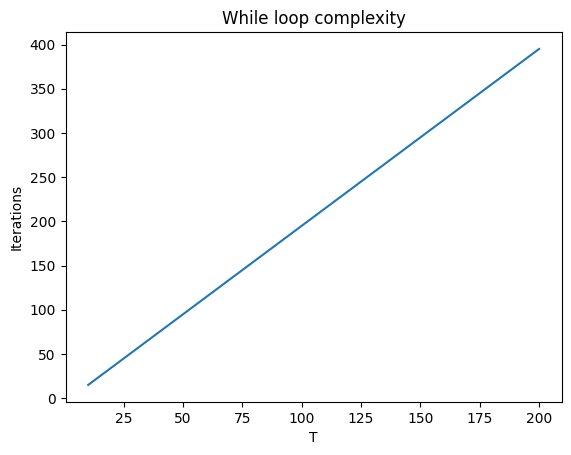

In [ ]:
# Plot it
plt.plot(range(10,201),worst_case_time_complexity)
plt.xlabel("T")
plt.ylabel("Iterations")
plt.title("While loop complexity")
plt.show()

It appears to be **linear**.

Following our approximation, let's assume that the loop is executed $\mathcal{O}(T)$ times.

The while loop total iterations are $\mathcal{O}(T) \cdot \mathcal{O}(T^2\sqrt{T})$ = $\mathcal{O}(T^3 \cdot \sqrt{T})$.


 Step 7 of the Hungarian algorithm:
```
# Step 7: do the assignment

    # Initialize assignment list
    assignment = []

    # We want to reorder our final_cost_matrix since we want to start assigning from the row that has fewer zeros
    sort_indexes = np.argsort(np.sum(final_cost_matrix == 0, axis=1))
    sorted_cost_matrix = final_cost_matrix[sort_indexes]

    # Get zeros position
    zeros = np.array(np.where(sorted_cost_matrix == 0)).T

    # Until there is a zero
    while zeros.shape[0] > 0:

        # Add assignment
        assignment.append(zeros[0])

        # Then remove all zeros in the same row or column from zeros_positions
        zeros = zeros[np.logical_and(zeros[:, 0] != zeros[0,0], zeros[:, 1] != zeros[0,1])]

    # Reorder assignment to initial order
    assignment = [(sort_indexes[i[0]], i[1]) for i in assignment]

    # Sort on the first element
    assignment = sorted(assignment, key = lambda x: x[0])
```
The sorting first counts all the zeros in each row  $\mathcal{O}(T^2)$ and then sorts the count_array  $\mathcal{O}(T \cdot \log(T))$.

The worst case of the while loop happens when the cost_matrix is composed of just zeros. In that case the `zeros` array has $T^2$ elements in the first iteration, $(T-1)^2$ in the second and so on, until it has $1$ element in the last one.

Since in each iteration the algorithm check each element of `zeros` to remove all elements within the same column or row, the total number of iterations is:
$\sum_{i=1}^{T} i^2 = \frac{T(T + 1)(2T + 1)}{6} = \mathcal{O}(T^3)$


#### Conclusion
In conclusion, assuming $S = \mathcal{O}(T)$, my solution does $\mathcal{O}(T^3 \cdot \sqrt{T})$ iterations.

### 3) Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. If the two differ, which one is right? (why?)


I asked ChatGPT the time complexity of the hungarian_algorithm function, given the other two. This is its response:

The time complexity of the Hungarian Algorithm implemented here is generally $\mathcal{O}(n^4)$, where $n$ is the number of agents/tasks in the assignment problem. Let's break down the complexity analysis:

1. **Initialization**: Subtracting the minimum element from each row and column takes $\mathcal{O}(n^2)$ time.

2. **Minimum Cover (in a loop)**:
    - The `minimum_cover` function, which uses the Hopcroft-Karp algorithm, has a time complexity of $\mathcal{O}(\sqrt{V} \cdot E)$, where $V$ is the number of vertices and $E$ is the number of edges. In this case, $V=n$ and $E$ could be at most $n^2$ (in the worst case, where every agent is connected to every task).
    - The loop that repeats the minimum cover step runs at most $n$ times because each iteration either increases the number of covered zeros or finds an optimal assignment. Therefore, the total complexity of all iterations is  $\mathcal{O}(n \cdot \sqrt{n} \cdot n^2)$, which simplifies to  $\mathcal{O}(n^{2.5})$.

3. **Updating the Cost Matrix**: In each iteration of the while loop, we find the minimum uncovered element and adjust the matrix accordingly. This operation has a time complexity of $\mathcal{O}(n^2)$ since we are traversing the entire cost matrix.

4. **Assignment and Reordering**: The final step involves finding the optimal assignment, which is done by finding zeros in the matrix. This can be done in $\mathcal{O}(n^2)$ time.

Considering all these steps together, the overall time complexity of the Hungarian Algorithm implementation is dominated by the minimum cover step, resulting in $\mathcal{O}(n^{2.5})$. It's important to note that this complexity is a general upper bound and might vary based on the characteristics of the specific problem instance.

#### Comment

The analysis of ChatGPT seems to be very near to my solution.

It correctly says that the Hopcroft-Karp algorithm has a worst-case time complexity of $\mathcal{O}(|E| \cdot \sqrt{|V|})$.

"*The loop that repeats the minimum cover step runs at most  n  times because each iteration either increases the number of covered zeros or finds an optimal assignment.*":

 following our approximation, we showed that it is a $\mathcal{O}(N)$, but from our simulation we've seen it can be greater than $N$.

The great error ChatGPT seems to do is writing that $n^2 \cdot \sqrt{n} \cdot n = n^{2.5}$.

If it wasn't for this error we would have come with the same analysis.


### 4) If you algorithm has exponential time complexity, can you provide a polynomial-time version?



It is already polynomial.

### 5) If $S=1$ how does the time complexity of an optimal algorithm to solve this problem change?



The problem becomes much easier assuming $S = 1$.

In that the following code would be enough:
```
# Initialize assignments list
optimal_assignment = []

# Initialize categories no athlete has in its skills
not_found_categories = []

# For every category
for category in categories:

  # Initialize the max_score as 0
  max_score = 0

  # Initialize best_athlete_id
  best_athlete_id = None

  # For every athlete
  for athlete_id in athletes:

    # Get associated athlete
    athlete = athletes[athlete_id]

    # If the athlete has the category in its skills and has the best score save its id
    if category in athlete.keys() and athlete[category] > max_score:
      best_athlete_id = athlete_id

  # If a best athlete has been found, create the assignment
  if best_athlete_id != None:
    optimal_assignment.append((best_athlete_id, category))
    athletes.pop(best_athlete_id)
  # If no athlete had that category, add it to the not_found_categories list
  else:
    not_found_categories.append(category)

# Assign to each not_found_category a random athlete
for i in  range(len(not_found_categories)):
  optimal_assignment.append((list(athletes.keys())[i], not_found_categories[i]))
```

This function has two for loops:
- the first one iterates over all categories and athletes, performin costant operations: $\mathcal{O}(N*M)$;
- the second one iterates over not_found_categories, performing costant operations: $\mathcal{O}(M)$.

Overall the time complexity is an $\mathcal{O}(N*M)$.


Below the code is applied to the first input, to check its optimality:

In [ ]:
# Get again  first input
athletes = input_1["athletes"].copy()
categories = input_1["categories"].copy()
N, M, S = input_1["dimensions"]


# Apply code
optimal_assignment = []
not_found_categories = []

# For every category
for category in categories:

  # Initialize the max_score as 0
  max_score = 0

  # Initialize best_athlete_id
  best_athlete_id = None

  for athlete_id in athletes:

    # Get associated athlete
    athlete = athletes[athlete_id]

    # If the athlete has the category in its skills and has the best score save its id
    if category in athlete.keys() and athlete[category] > max_score:
      best_athlete_id = athlete_id

  # If a best athlete has been found, create the assignment
  if best_athlete_id != None:
    optimal_assignment.append((best_athlete_id, category))
    athletes.pop(best_athlete_id)
  else:
    not_found_categories.append(category)

for i in  range(len(not_found_categories)):
  optimal_assignment.append((list(athletes.keys())[i], not_found_categories[i]))

In [ ]:
# Reload athletes (which has been modified in the code above)
athletes = input_1["athletes"].copy()

# Print results
print(f"\n Optimal assignment: \n {optimal_assignment}\n")
score = sum([athletes[athlete_id].get(category, 0) for athlete_id, category in optimal_assignment])
print(f"This assignment is optimal. It obtained {score} points")


 Optimal assignment: 
 [('14', 'SWM'), ('11', 'VOL'), ('6', 'ATH'), ('1', 'BSK'), ('7', 'HCK'), ('13', 'SWM'), ('2', 'VOL'), ('3', 'VOL'), ('4', 'BSK'), ('5', 'BSK')]

This assignment is optimal. It obtained 370 points


## Part B

The success of a project depends not only on the expertise of the people involved but also on how effectively they work together as a team. So this time, instead of focusing on who has the best skills, let's focus on finding a group of individuals who can function as a team to accomplish a specific task.

Given a set of skills $T$, our goal is to find a set of individuals $X' ⊆ X$ such that every required skill in $T$ is exhibited by at least one individual in $X'$. Additionally, the members of team $X'$ should have low effort to work together i.e. all the members of the team $X'$ work well with each other.

This problem can be easily visualised with graphs: we define an undirected weighted graph $G(V,E)$  where every element $x_i \in X$ has a corresponding node $v_i \in V$
. The weights of the edges represent the effort required to work well together: the lower the weight of an edge between two nodes, the less effort the corresponding team members need to work well together.

We define as acceptable solution any subset $V' \subseteq V$ such that
$T \cap \cup_{v_i \in V'} S_{v_i}$ where $S_{v_i}$ = {set of skills of member
 corresponding to the vertex  $v_i$}.

  The goal is to find, among all acceptable solutions, the one that minimizes the effort to work together $E_c(V')$. The effort to work together $E_c(V')$ is the cost of the minimum spanning tree on the subgraph $G[V']$ i.e. the sum of the weights of its edges.

### 1) Prove or disprove that the problem is NP-complete.


In order to prove that a problem $P$ is $NP$-$complete$ we need to:
- prove that $P \in NP$;
- prove that there's a polynomial time reduction from a $NP$-$complete$ problem
  $P'$ to $P$.


Trying to prove the first part, I came up with an example that refutes it:

Let $N$ be the number of athletes and $K$ be the number of required skills in $T$ (counting also repetitions).

Let's assume the case where each athlete $v_i$ has in his set of skills $S_{v_i}$ all the $K$ skills required in $T$.

This would mean that **any** athlete is feasible for all the jobs, which implies we would have $\binom{N}{K}$ possible solutions.

Now let's assume that $V'⊆ V$ is the optimal solution, and let $C$ be its minimum spanning tree cost .

To prove its correctness we would need to check that all the other possible solutions minimum spanning tree cost is greater then $C$.

Considering that the time complexity of computing the minimum spanning tree cost is  $\mathcal{O}((|E| + |V|)\log(|V|) = \mathcal{O}((K^2 + K)\log(K)$,

to check all the combinations it would take a time complexity of $\mathcal{O}(\binom{N}{K}(K^2 + K)\log(K) )$.

Since $\binom{N}{K}$ is definitely **not polynomial** we have proven that this problem is **not NP-complete**.

### 2) Write a heuristic in order to approximate the best solution for this problem.


We could implement an algorithm that uses a treshold in order to evaluate if a certain athlete is "collaborative" enough to be included:


1. **Initialization:**
   - Begin with an empty set $V'$.
   - Fix a threshold value $t$.

2. **Sort Nodes:**
   - Order the nodes in descending order based on the size of their skills sets.

3. **Greedy Selection:**
   - Iterate through the sorted nodes: if a node $v_i$  contributes a new skill and at least one of its edges  with the existing nodes in $V'$ has a weight lower then $t$, add it to $V'$.

4. **Termination:**
   - Continue the process until either all required skills are covered or no more nodes can be added.


This algorithm is strongly dependant on the threshold value $t$:
-  setting a too low $t$ would mean not covering all skills, hence not obtaining a solution to the problem;
- setting a too high $t$ would result in a very non-optimal result.

Even if the  provided algorithm is **fast**, it would be necessary to run it multiple times in order to find the best $t$.

### 3) What is the time complexity of your solution ?


 The sorting step time complexity is $\mathcal{O}(N \cdot \log(N))$.

 For each new node $v_i$ we check its edges with the nodes already in $ V'$,
 hence, iterating all the nodes, has a complexity of $\mathcal{O}(N \cdot K)$.

 Assuming that $ K = \mathcal{O}(N)$, the overall time complexity would be $\mathcal{O}(N \cdot \log(N))$.
